# Brief Description 

#We will be performing an exhaustive exploration of a dataset that contains
#employment data and crime data from Mexico
#Our exploratory analysis is structured as follows:
#1  Identify the 4 most common types of crime using a function and a histogram
#2  Identify the years and the states with the highest (and lowest) crime rates
#3  Plot a time series plot showing the trend of crime rates over time
#4  Explore the relationships between the variables
#5  Choose two variables that appear very related(unrelated) and plot a scatter plot between the pairs of variables
#6  Identify any outliers
#7  Document the main findings



# 1. Loading Various Packages and Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sb
from collections import Counter
from IPython.core.display import Image
import scipy.stats as stats

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
fig = plt.figure(figsize=(10,6))

In [5]:
import numpy as np
from scipy.stats import mode

In [18]:
# read in stata file and create a pandas dataframe

df = pd.read_stata('/Users/chris/Desktop/state merged.dta')
df1 = pd.read_stata('/Users/chris/Desktop/crime_rate_state.dta')
df2=pd.read_stata('/Users/chris/Desktop/emp_state.dta')
df3=pd.read_stata('/Users/chris/Desktop/pop_state.dta')
df4=pd.read_stata('/Users/chris/Desktop/unshaped state data.dta')
df5=pd.read_stata('/Users/chris/Desktop/gendered.dta')
df6=pd.read_stata('/Users/chris/Desktop/manuf_by_year.dta')
df7=pd.read_stata('/Users/chris/Desktop/crime_jobs.dta')

# 2. Describe the basic format and variables in the data


In [93]:
#I want to see the variable types
df7.dtypes


year                            int16
hom_rate                      float32
delitos_patrimoniales_rate    float32
delitos_sexuales_rate         float32
lesiones_rate                 float32
otros_delitos_rate            float32
secuestro_rate                float32
robo_comun_rate               float32
robo_de_ganodo_rate           float32
robo_en_carretoros_rate       float32
robo_inst_bancarias_rate      float32
fem_manuf_rate                float32
male_manuf_rate               float32
dtype: object

In [94]:
#Let's see if I have a balanced panel dataset
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 13 columns):
year                          423 non-null int16
hom_rate                      423 non-null float32
delitos_patrimoniales_rate    423 non-null float32
delitos_sexuales_rate         423 non-null float32
lesiones_rate                 423 non-null float32
otros_delitos_rate            423 non-null float32
secuestro_rate                423 non-null float32
robo_comun_rate               423 non-null float32
robo_de_ganodo_rate           423 non-null float32
robo_en_carretoros_rate       423 non-null float32
robo_inst_bancarias_rate      423 non-null float32
fem_manuf_rate                423 non-null float32
male_manuf_rate               423 non-null float32
dtypes: float32(12), int16(1)
memory usage: 24.0 KB


In [95]:
## How many rows and columns does the dataset has
df7.shape

(423, 13)

In [96]:
#summary statistics
df7.describe()

,year,hom_rate,delitos_patrimoniales_rate,delitos_sexuales_rate,lesiones_rate,otros_delitos_rate,secuestro_rate,robo_comun_rate,robo_de_ganodo_rate,robo_en_carretoros_rate,robo_inst_bancarias_rate,fem_manuf_rate,male_manuf_rate
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,2005.007092,30.800444,258.064941,13.533133,220.735947,415.539276,0.755930,543.733398,4.694506,1.253646,0.452170,1307.318237,2405.027832
std,4.311612,17.570141,172.347412,6.714459,119.871033,341.267975,2.051149,436.609100,4.888125,2.772482,0.725121,1253.635376,1932.913574
min,1998.000000,4.221171,0.000000,3.128289,0.000000,0.000000,0.000000,44.511845,0.000000,0.000000,0.000000,63.207081,218.369644
25%,2001.000000,18.248763,141.583488,8.452111,140.611320,197.951241,0.119743,274.107834,0.000000,0.000000,0.063538,301.397095,883.102539
50%,2005.000000,24.531157,221.467224,12.439877,195.571228,317.280548,0.310785,417.269440,4.079620,0.000000,0.217131,793.055603,1594.896606
75%,2009.000000,39.442511,320.511597,17.235769,284.649933,513.408966,0.834399,663.319183,6.695250,1.478836,0.509372,2117.878296,3709.975952
max,2012.000000,128.287064,1413.758789,43.182842,763.786804,1729.098511,38.166130,3352.963623,26.040760,28.034288,5.527934,5887.251953,7994.992188


In [97]:
#Transposing the table makes it easier to visualize my summary statistics
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
year,423.0,2005.007092,4.311612,1998.000000,2001.000000,2005.000000,2009.000000,2012.000000
hom_rate,423.0,30.800444,17.570141,4.221171,18.248763,24.531157,39.442511,128.287064
delitos_patrimoniales_rate,423.0,258.064941,172.347412,0.000000,141.583488,221.467224,320.511597,1413.758789
delitos_sexuales_rate,423.0,13.533133,6.714459,3.128289,8.452111,12.439877,17.235769,43.182842
lesiones_rate,423.0,220.735947,119.871033,0.000000,140.611320,195.571228,284.649933,763.786804
otros_delitos_rate,423.0,415.539276,341.267975,0.000000,197.951241,317.280548,513.408966,1729.098511
secuestro_rate,423.0,0.755930,2.051149,0.000000,0.119743,0.310785,0.834399,38.166130
robo_comun_rate,423.0,543.733398,436.609100,44.511845,274.107834,417.269440,663.319183,3352.963623
robo_de_ganodo_rate,423.0,4.694506,4.888125,0.000000,0.000000,4.079620,6.695250,26.040760
robo_en_carretoros_rate,423.0,1.253646,2.772482,0.000000,0.000000,0.000000,1.478836,28.034288


In [98]:
# Print out the first 5 rows:
df7.head(5)

,year,hom_rate,delitos_patrimoniales_rate,delitos_sexuales_rate,lesiones_rate,otros_delitos_rate,secuestro_rate,robo_comun_rate,robo_de_ganodo_rate,robo_en_carretoros_rate,robo_inst_bancarias_rate,fem_manuf_rate,male_manuf_rate
0,1998,24.323854,283.506744,10.008859,176.318848,273.963409,0.698292,395.117126,0.000000,0.000000,0.698292,3177.696045,4722.900879
1,1999,20.016005,329.981354,6.445832,204.570328,297.526001,0.226170,409.706116,0.000000,0.000000,0.226170,3495.337158,5002.756836
2,2000,19.134630,320.010223,8.357655,202.013321,298.566223,0.109969,343.103729,0.000000,0.000000,0.109969,3639.758789,5196.372070
3,2001,16.213676,281.633667,6.738152,191.405609,278.580444,0.000000,384.811615,0.000000,0.000000,0.000000,2973.630371,4575.520996
4,2002,17.403393,338.354370,5.565039,205.299332,306.077148,0.202365,336.431885,2.833111,0.910643,0.202365,2705.620605,4366.835449


# 3. Exploratory analysis

In [20]:
#Identifying most common type of crime 
#I want to generate the mean of my crime variables in 2012 (the most recent year for which we have data)
#To do so, I can create a mask
mask_2012=df1['year']==2012
df1_2012=df1[mask_2012]
df1_2012.mean()

year                          2012.000000
hom_rate                        38.422340
delitos_patrimoniales_rate     225.870285
delitos_sexuales_rate           14.035436
lesiones_rate                  169.828629
otros_delitos_rate             445.342316
secuestro_rate                   1.359759
robo_comun_rate                644.527527
robo_de_ganodo_rate              6.710171
robo_en_carretoros_rate          4.145610
robo_inst_bancarias_rate         0.506461
dtype: float32

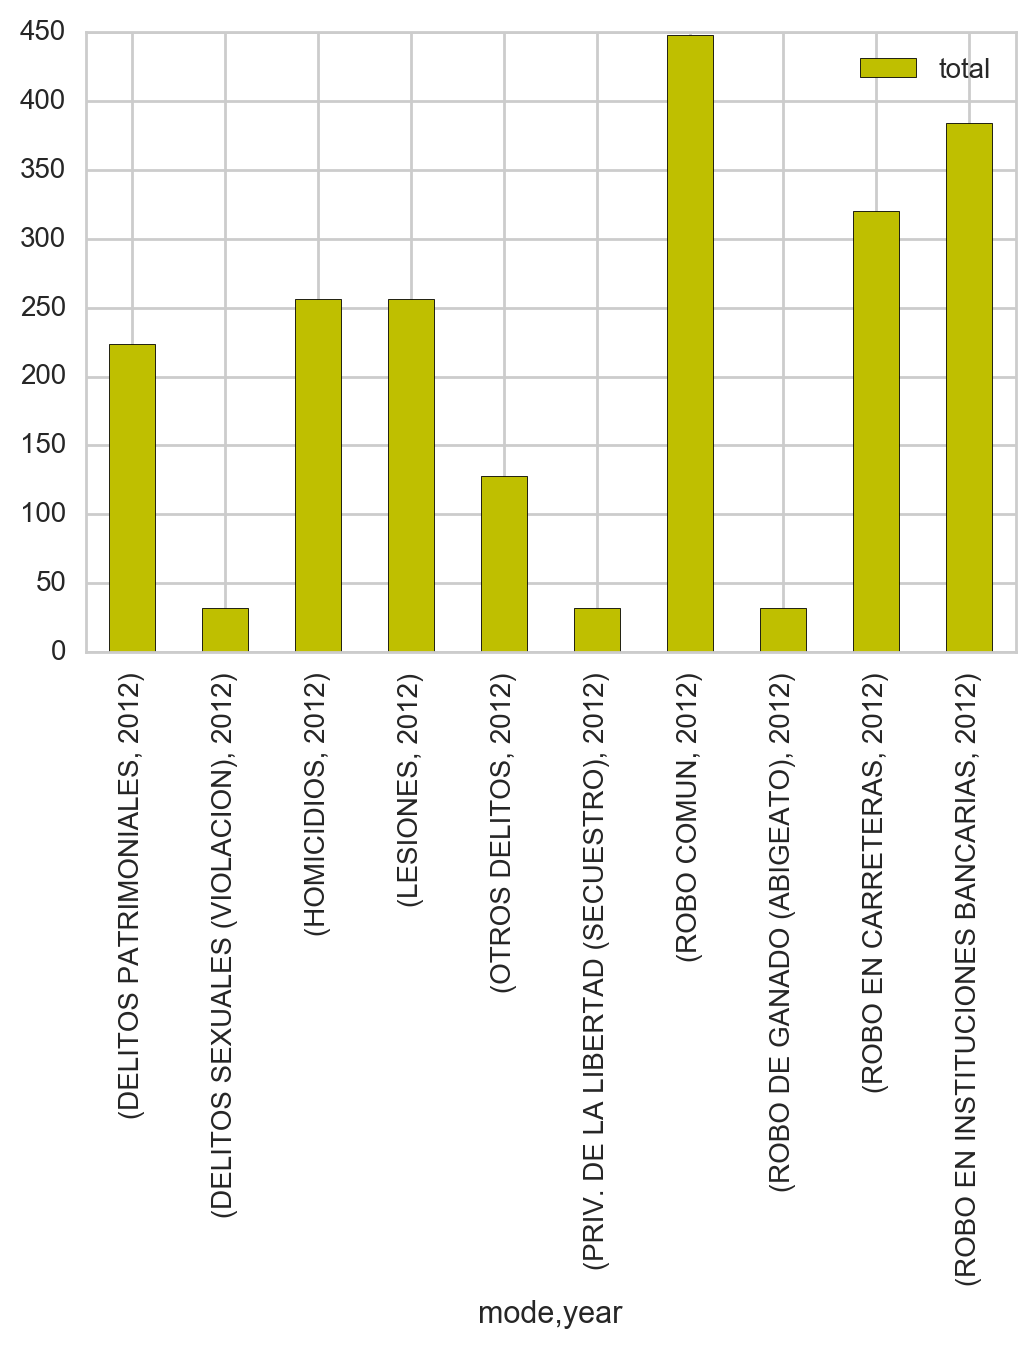

In [15]:
#Histogram of types of crime in 2012 
df4.groupby(['mode','year']).count().plot(kind="bar", color='y')
plt.show()

In [32]:
#We see from the graph above that the 4 most frequent types of crime in 2012 were
#robo_comun                  
#robo_en_carretoros      
#robo_inst_bancarias
#homicidios
#From now on, we will only focus on those 4 types of crime

In [21]:
#Let's see what were the years and the states with the highest crime rate
def max_crime_rate(crime_df,crime_type):
    max_crime = crime_df[['year','state',crime_type]].groupby(['year','state'])
    max_crime = max_crime.sum().reset_index().sort_values(by = crime_type, ascending = False).head(1)
    return max_crime

In [22]:
max_crime_rate(df1,'robo_comun_rate')
#Robo_comun_rate was highest in 1998 in the state of Baja California

,year,state,robo_comun_rate
1,1998,baja california,3352.963623


In [23]:
max_crime_rate(df1,'robo_en_carretoros_rate')
##Robo_en_carretoros_rate was highest in 2012 in the state of Tlaxcala

,year,state,robo_en_carretoros_rate
419,2012,tlaxcala,28.034288


In [24]:
max_crime_rate(df1,'robo_inst_bancarias_rate')
#Robo_inst_bancarias_rate was highest in 2010 in the state of Sinaloa

,year,state,robo_inst_bancarias_rate
359,2010,sinaloa,5.527934


In [26]:
max_crime_rate(df1,'hom_rate')
#Homicidios_rate was highest in 2010 in the state of Chihuahua

,year,state,hom_rate
344,2010,chihuahua,128.287064


In [27]:
##Let's see what were the years and the states with the lowest crime rate for each type of incidents
def min_crime_rate(crime_df,crime_type):
    min_crime = crime_df[['year','state',crime_type]].groupby(['year','state'])
    min_crime = min_crime.sum().reset_index().sort_values(by = crime_type, ascending = True).head(1)
    return min_crime

In [28]:
min_crime_rate(df1,'robo_comun_rate')
#Robo_comun_rate was lowest in 2007 in the state of Campeche

,year,state,robo_comun_rate
257,2007,campeche,44.511845


In [29]:
min_crime_rate(df1,'robo_en_carretoros_rate')
#Robo_en_carretoros_rate was lowest in 1998 in the state of Aguascalientes

,year,state,robo_en_carretoros_rate
0,1998,aguascalientes,0.0


In [30]:
min_crime_rate(df1,'robo_inst_bancarias_rate')
#Robo_inst_bancarias_rate was lowest in 2004 in the state of Nayarit

,year,state,robo_inst_bancarias_rate
211,2005,nayarit,0.0


In [32]:
min_crime_rate(df1,'hom_rate')
#Homicidios_rate was lowest in 2001 in the state of Tabasco

,year,state,hom_rate
219,2005,tabasco,4.221171


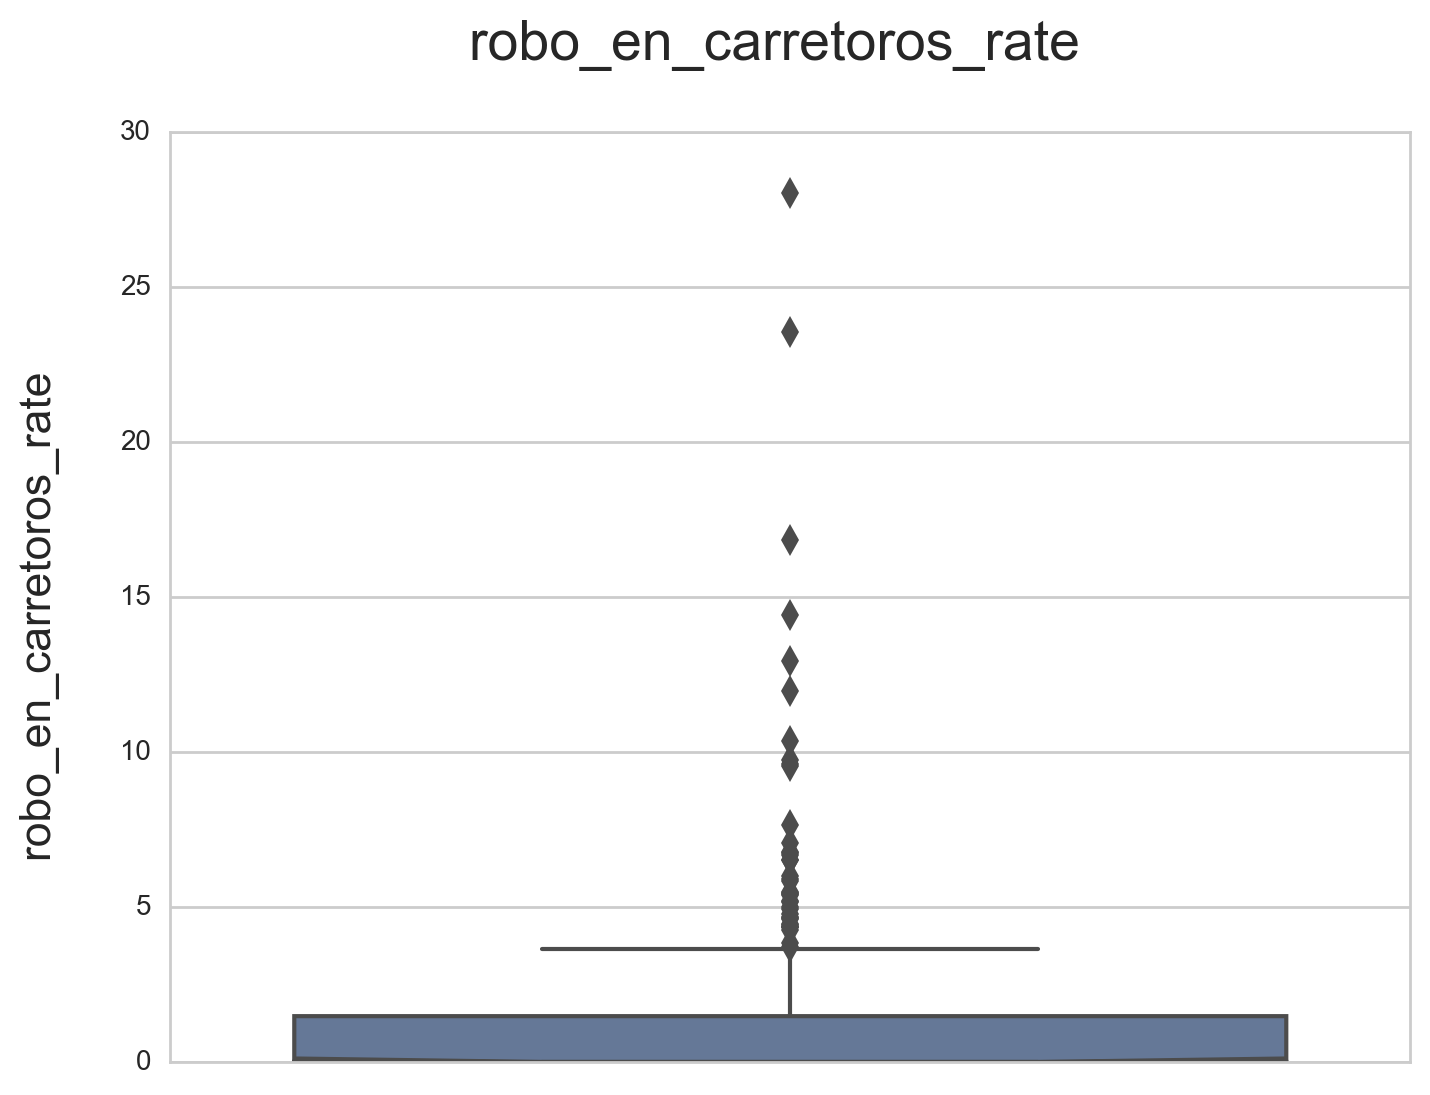

In [33]:
#Plot variables with potential outliers using seaborn boxplots
#Let's plot the 4 most frequent types of crimes in 2012 to identify potential outliers using seaborn boxplots
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.robo_en_carretoros_rate    , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('robo_en_carretoros_rate   \n', fontsize=16)
ax.set_title('robo_en_carretoros_rate  \n', fontsize=20)

plt.show()

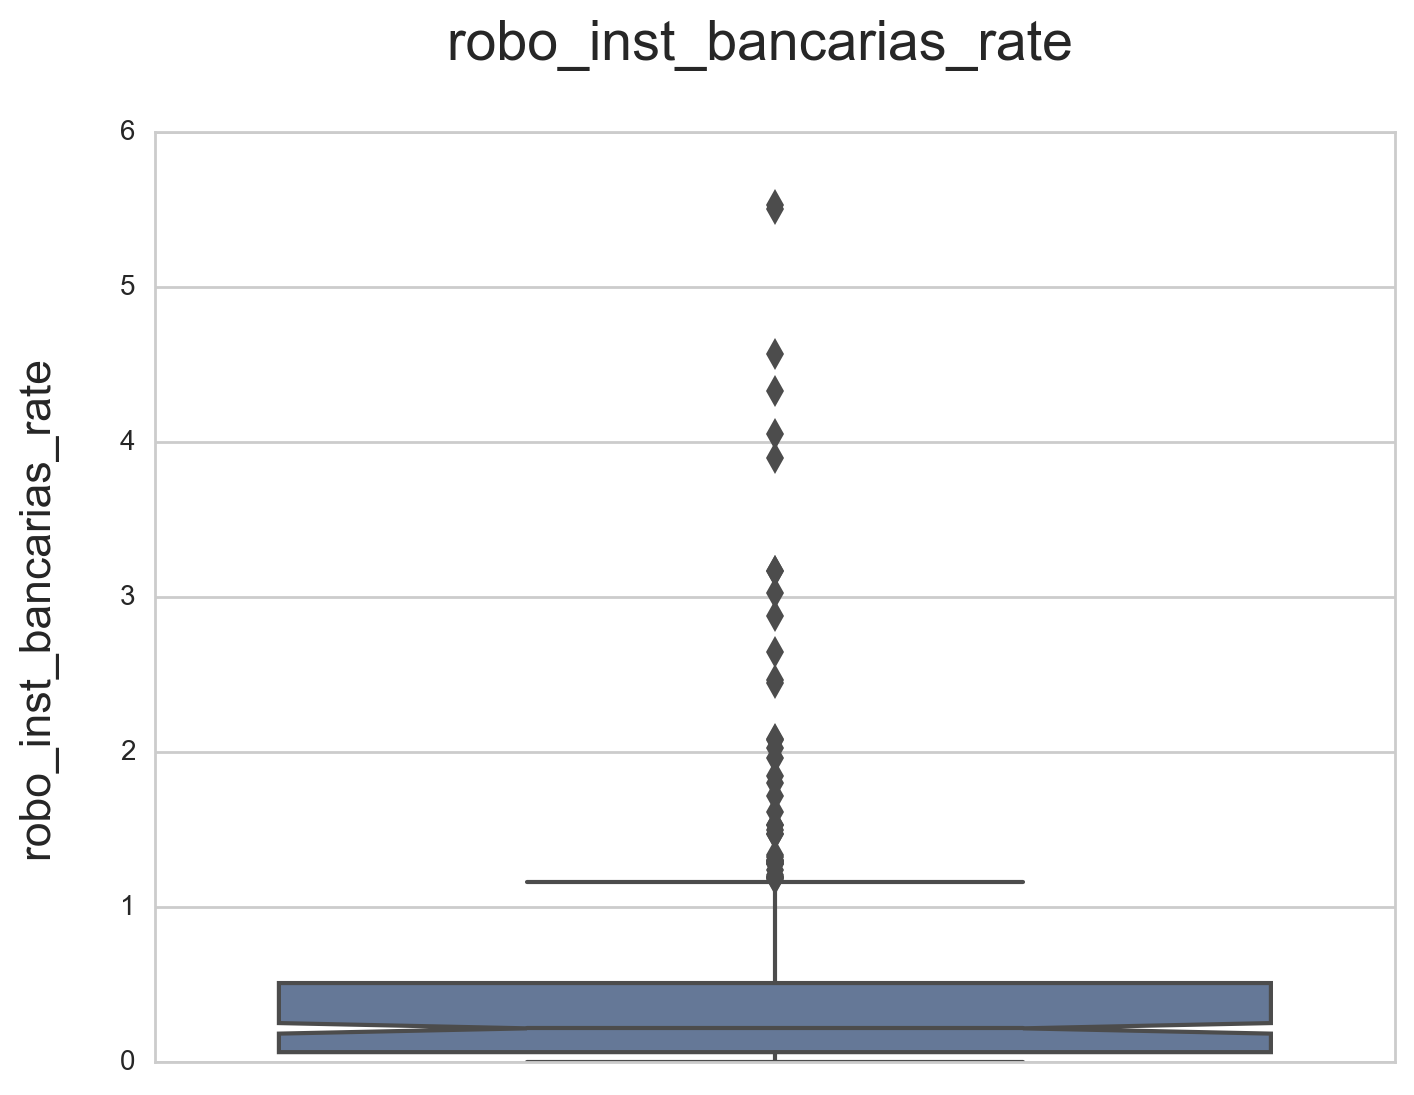

In [92]:
#Visualizing outliers
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.robo_inst_bancarias_rate   , orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('robo_inst_bancarias_rate  \n', fontsize=16)
ax.set_title('robo_inst_bancarias_rate  \n', fontsize=20)

plt.show()

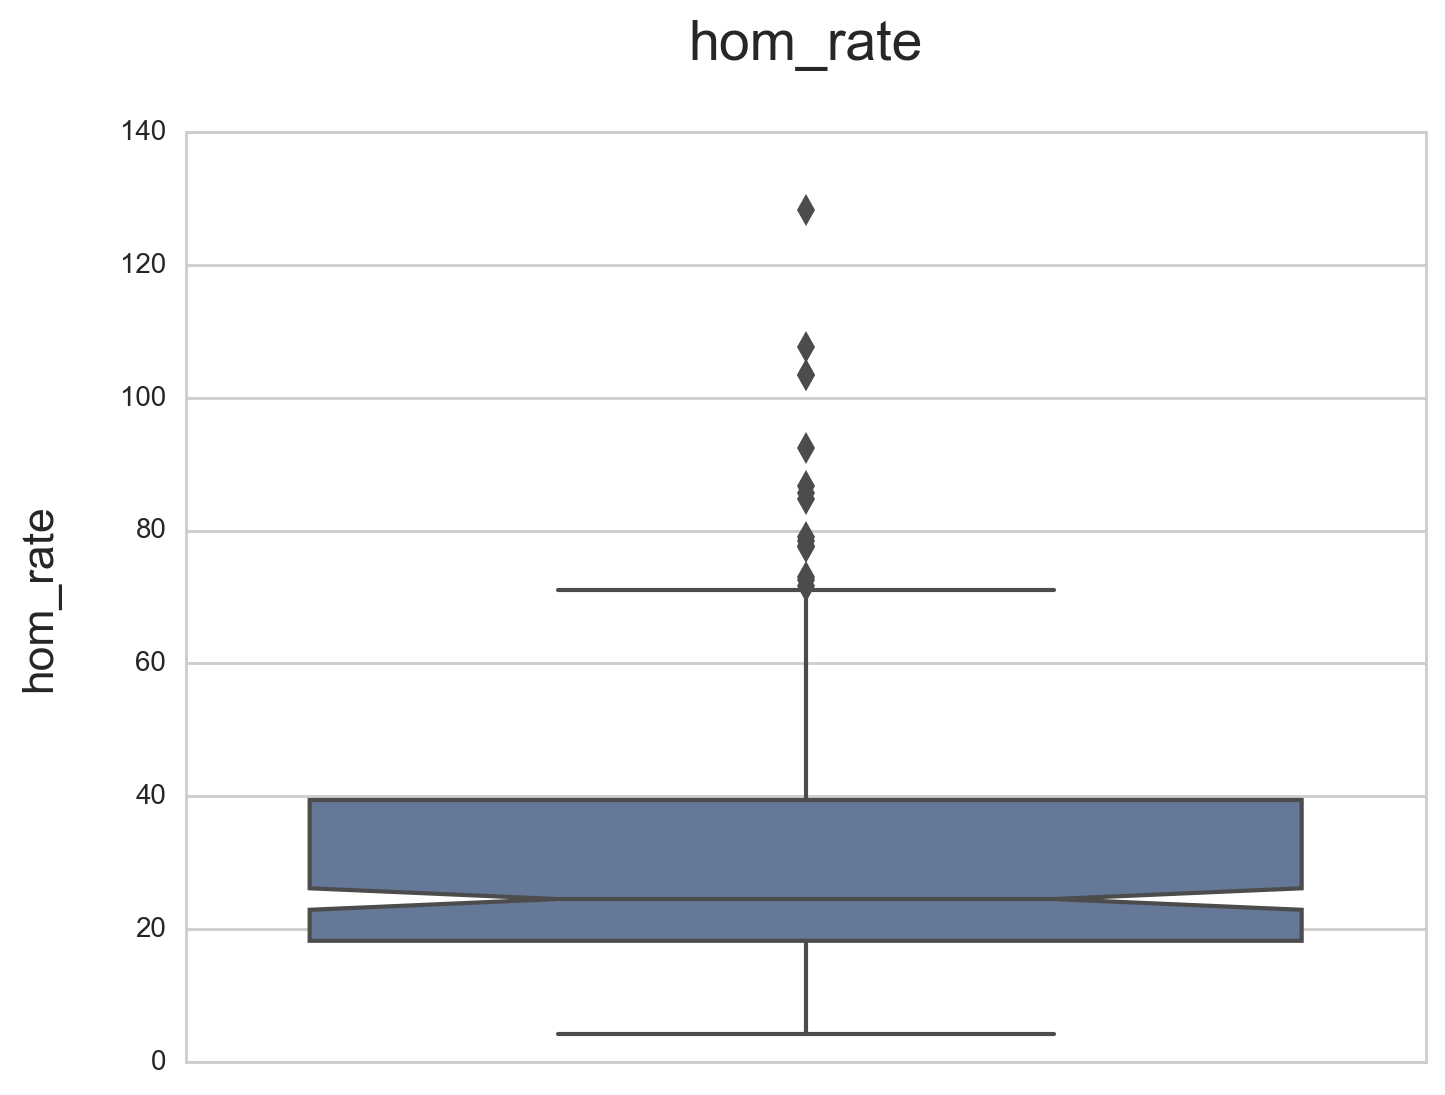

In [36]:
#Visualizing outliers 
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.hom_rate, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('hom_rate\n', fontsize=16)
ax.set_title('hom_rate\n', fontsize=20)

plt.show()

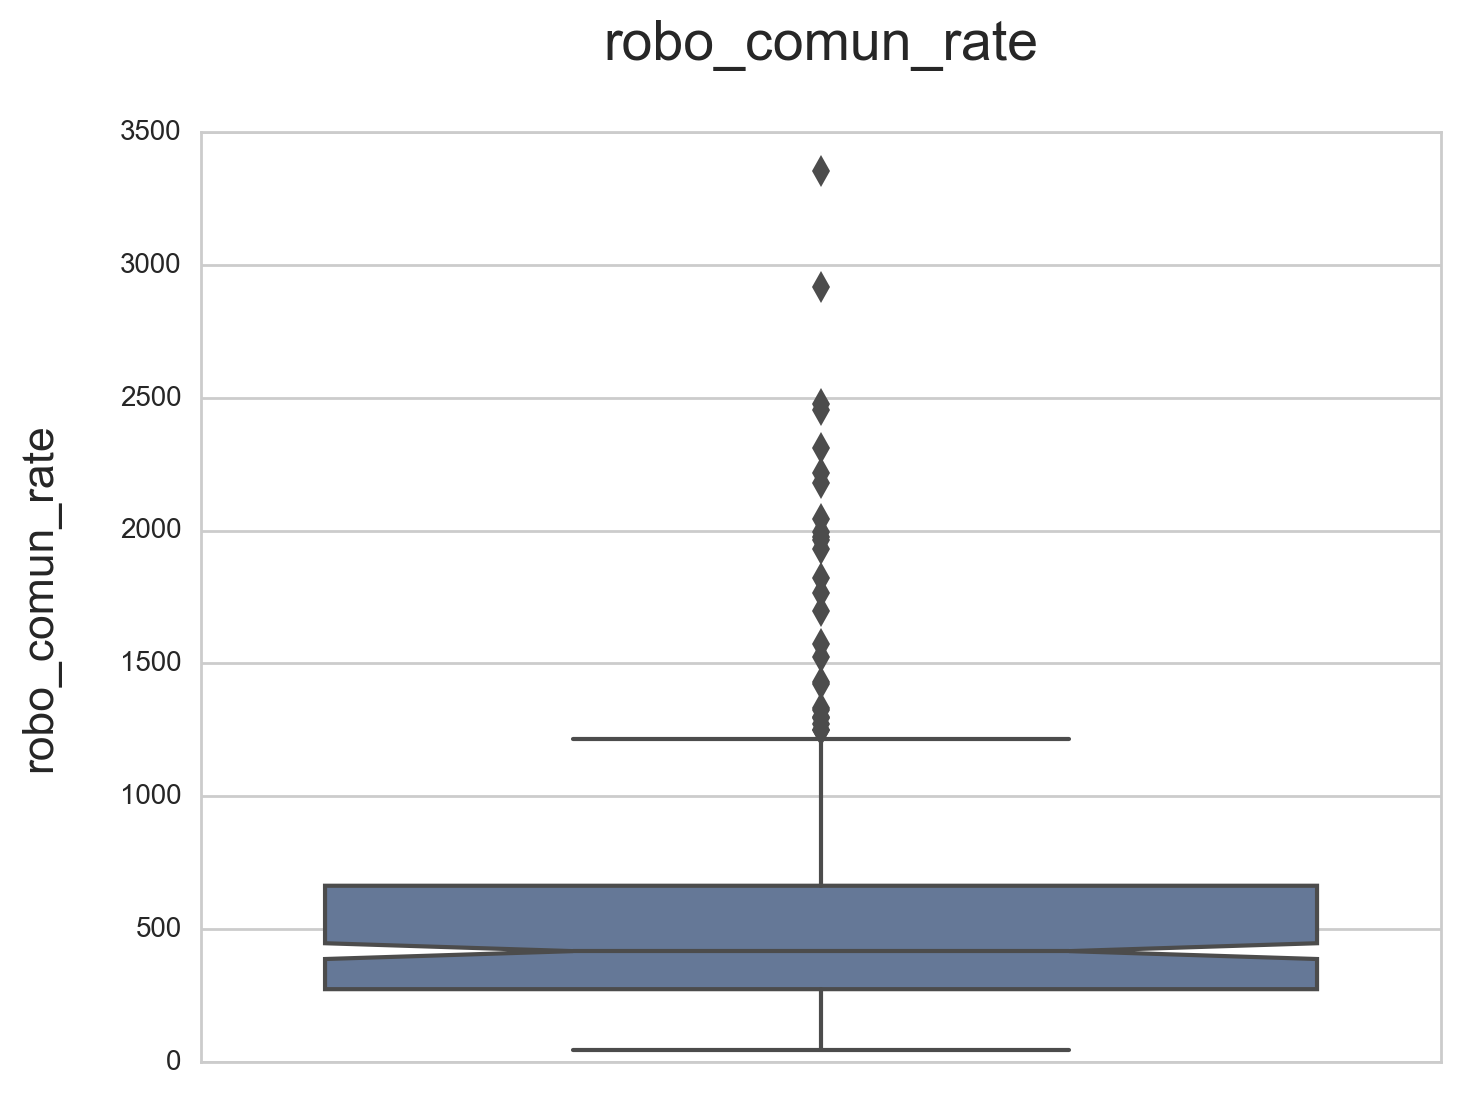

In [37]:
#Visualizing outliers
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(df1.robo_comun_rate, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('robo_comun_rate\n', fontsize=16)
ax.set_title('robo_comun_rate\n', fontsize=20)

plt.show()

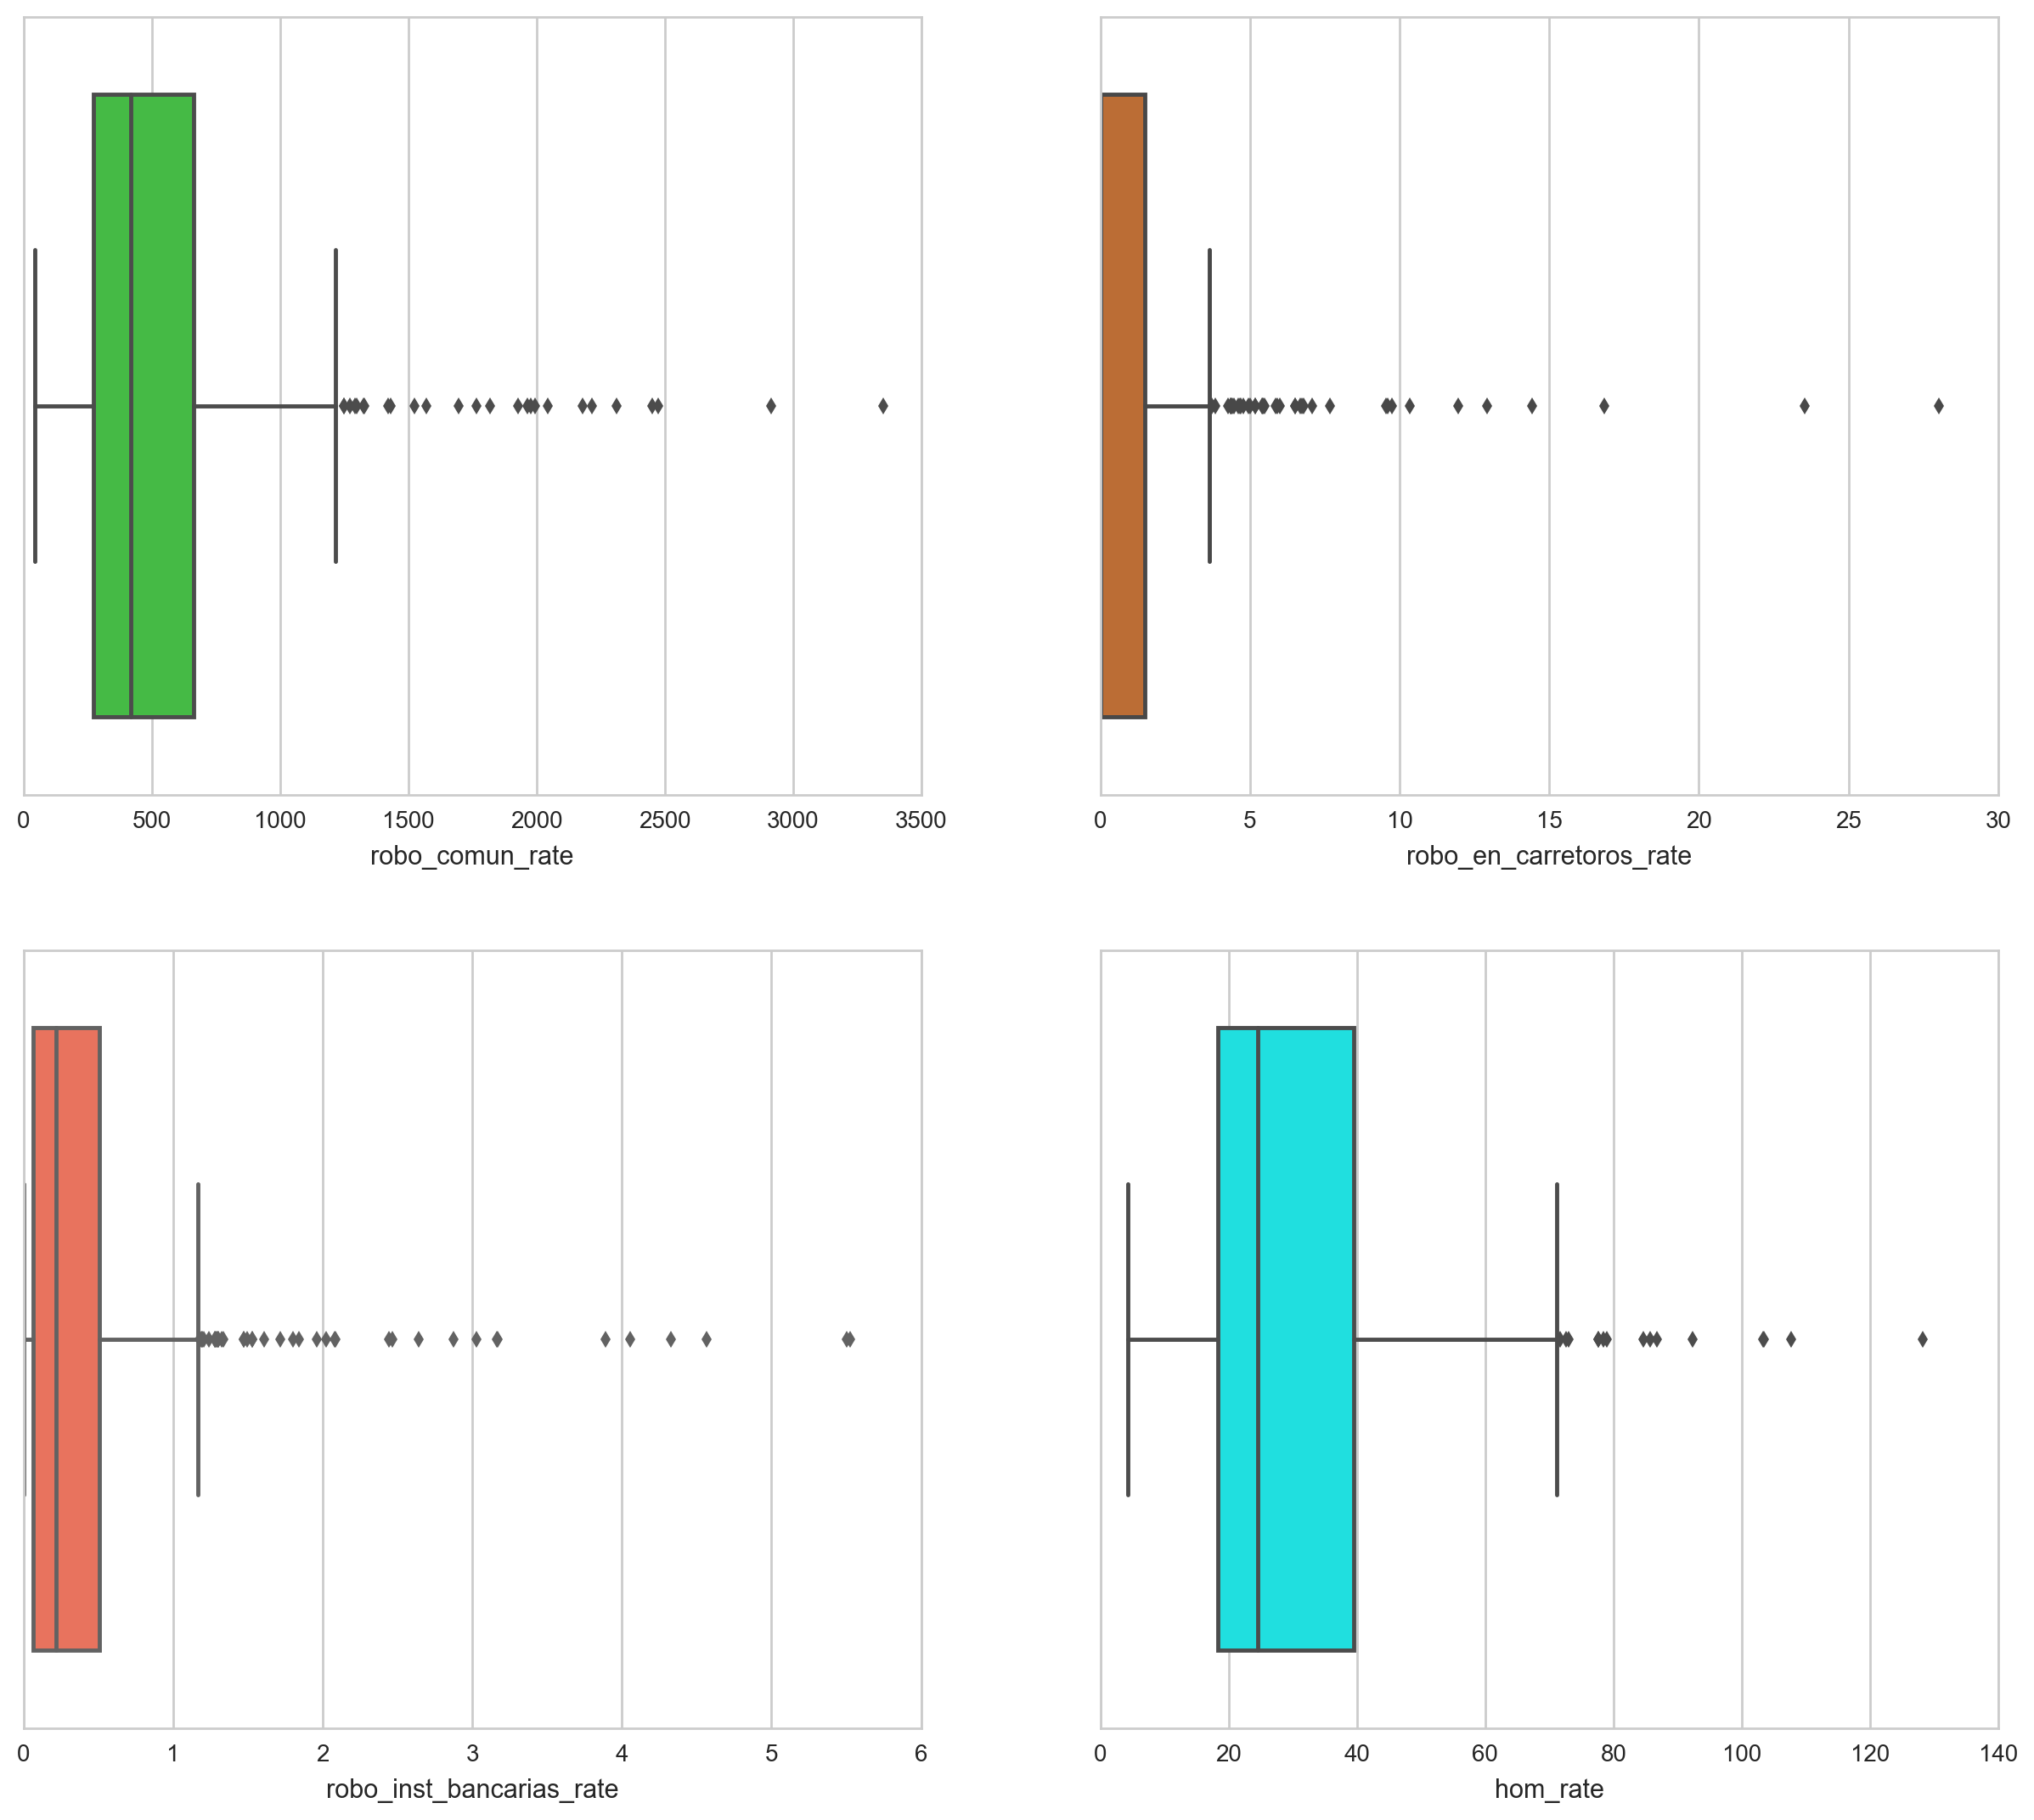

In [38]:
#COMBINES the 4 top incidents in one graph

# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'


fig, axarr = plt.subplots(2, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.boxplot(df1.robo_comun_rate ,ax=axarr[0,0], color='limegreen')

axarr[0,1] =sns.boxplot(df1.robo_en_carretoros_rate,ax=axarr[0,1], color='chocolate')
                          
axarr[1,0] = sns.boxplot(df1.robo_inst_bancarias_rate ,ax=axarr[1,0], color='tomato')

axarr[1,1] = sns.boxplot(df1.hom_rate  ,ax=axarr[1,1], color='cyan')

plt.show()




In [ ]:
#From the boxplots, it looks like my 4 crime rates have real outliers.

In [39]:
# Evolution of the crime rate by year 
# We want to see how the 4 most frequent incidents in 2012 have evolved over time
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dtime
import string
import seaborn as sns
import matplotlib.colors as colors

In [40]:
df1.year=pd.to_datetime(df1.year,format="%Y")

In [41]:
df1.year.dtype

dtype('<M8[ns]')

In [42]:
graph_1=df1[['year','robo_comun_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)

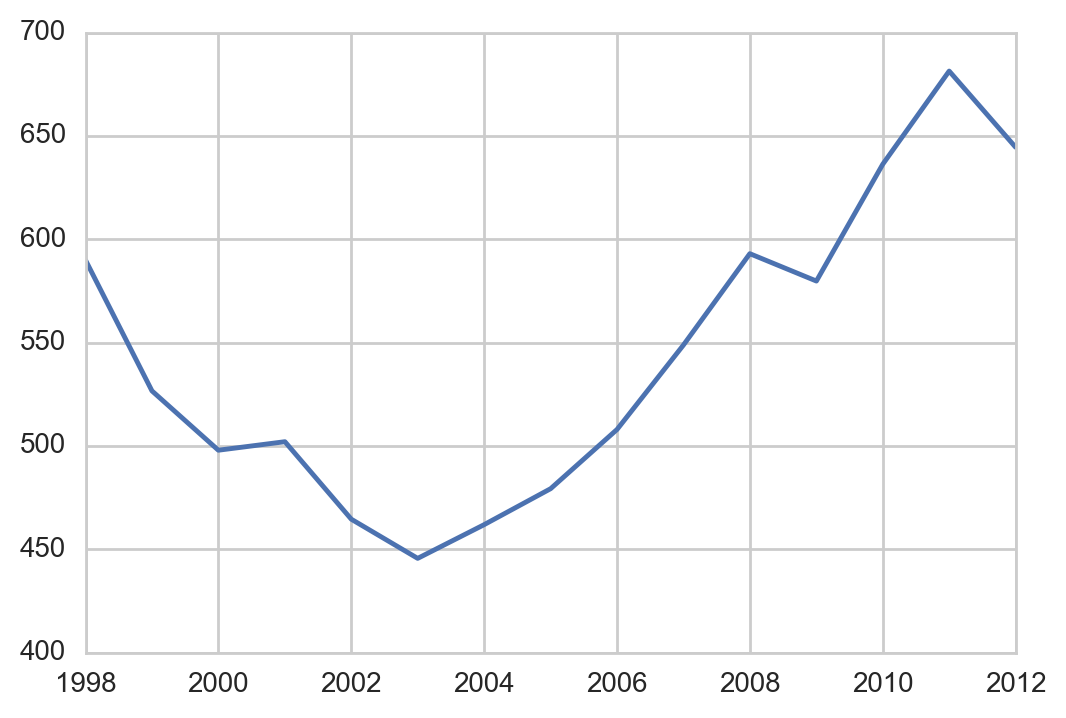

In [43]:
plt.plot(graph_1.year,graph_1.robo_comun_rate)

In [44]:
graph_2=df1[['year','robo_inst_bancarias_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)

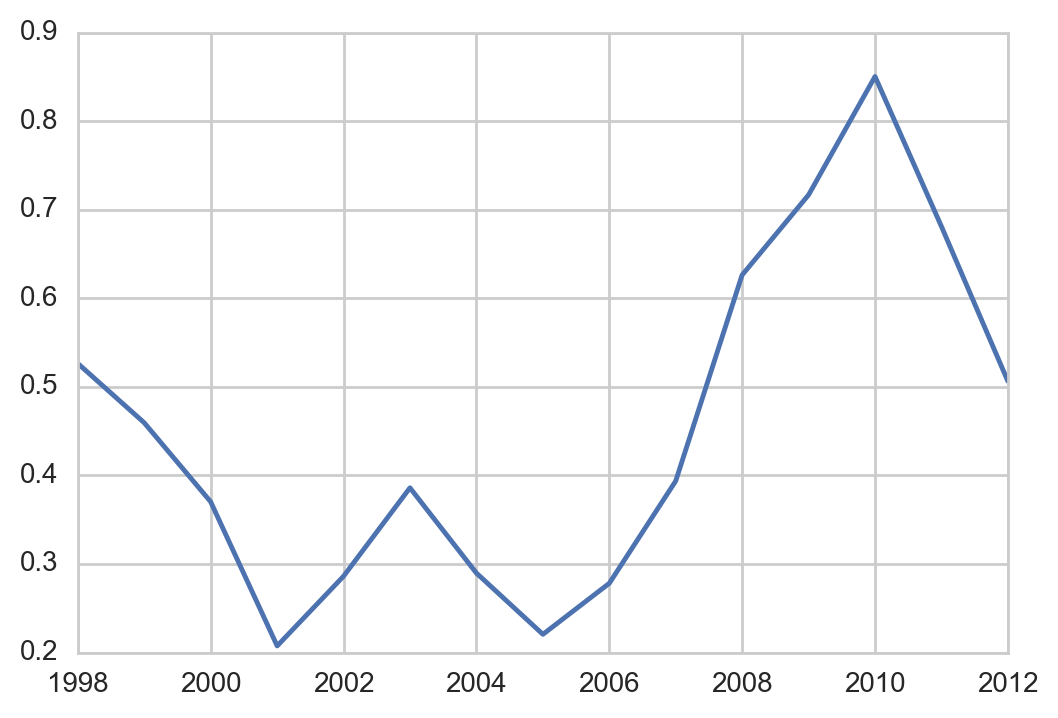

In [46]:
plt.plot(graph_2.year,graph_2.robo_inst_bancarias_rate)

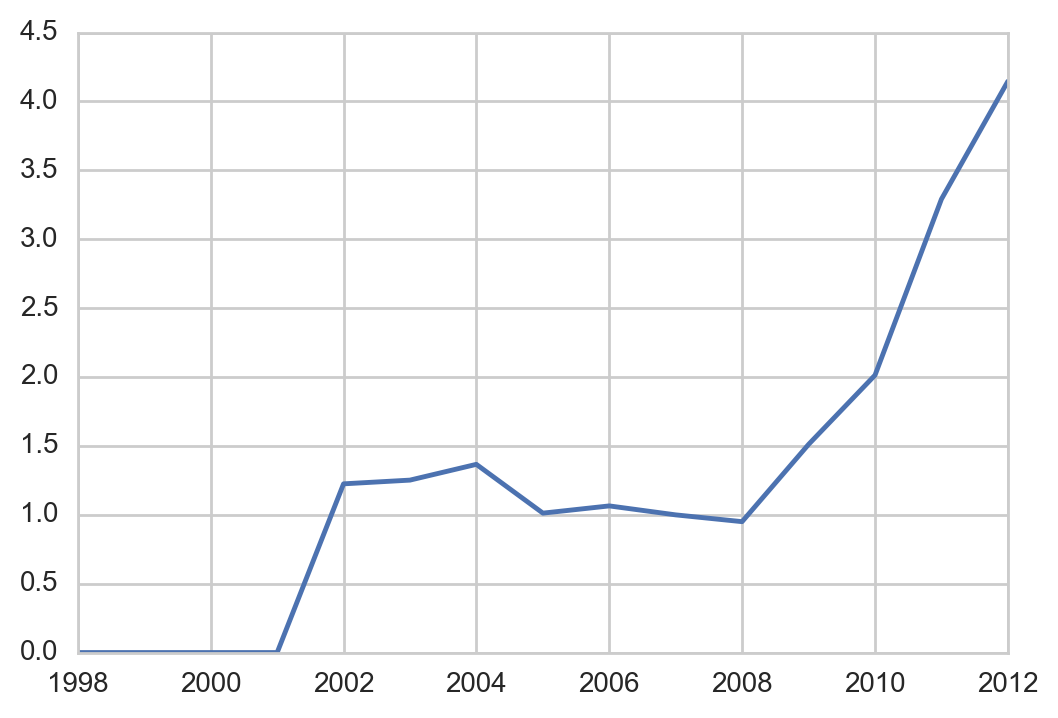

In [47]:
graph_3=df1[['year','robo_en_carretoros_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)
plt.plot(graph_3.year,graph_3.robo_en_carretoros_rate)


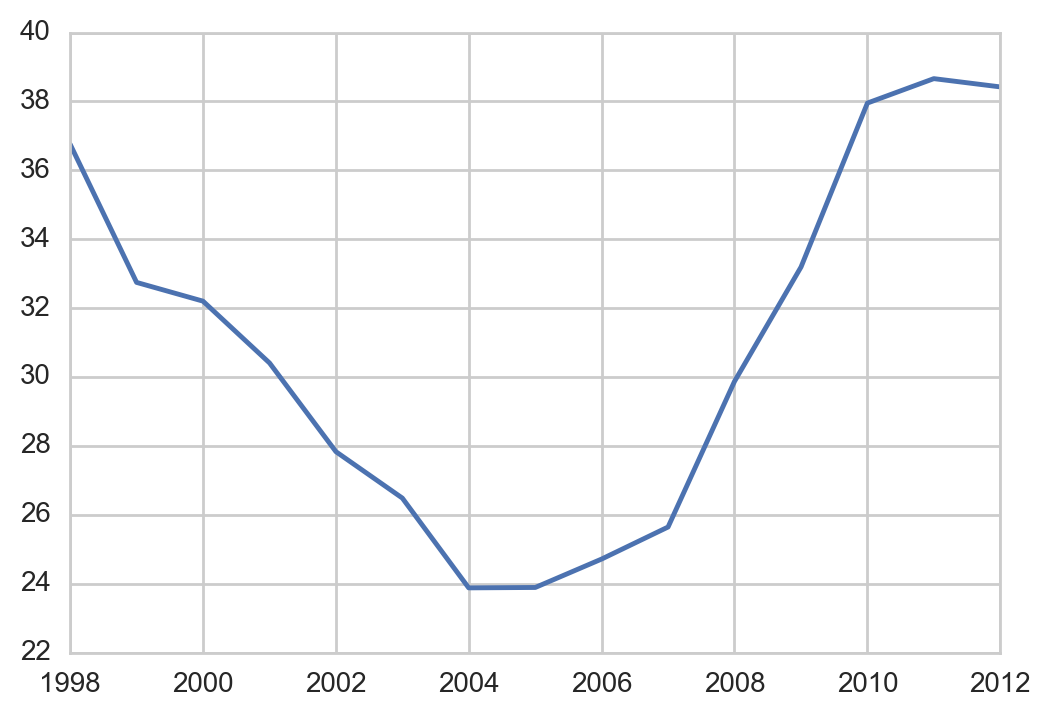

In [48]:
graph_4=df1[['year','hom_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)
plt.plot(graph_4.year,graph_4.hom_rate)

In [ ]:
##Now let's look at the employment data 

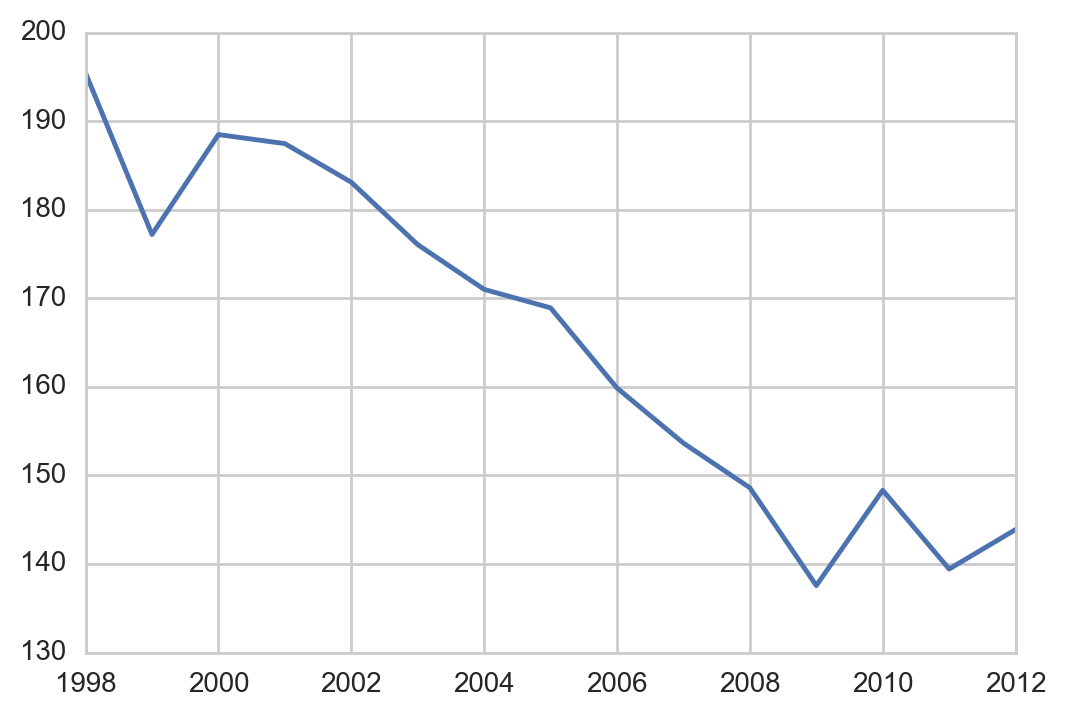

In [54]:
#How has the trend of female manufacturing jobs evolved over time
#Historical trends
graph_5=df2[['year','fem_Manuf_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)
plt.plot(graph_5.year,graph_5.fem_Manuf_rate)

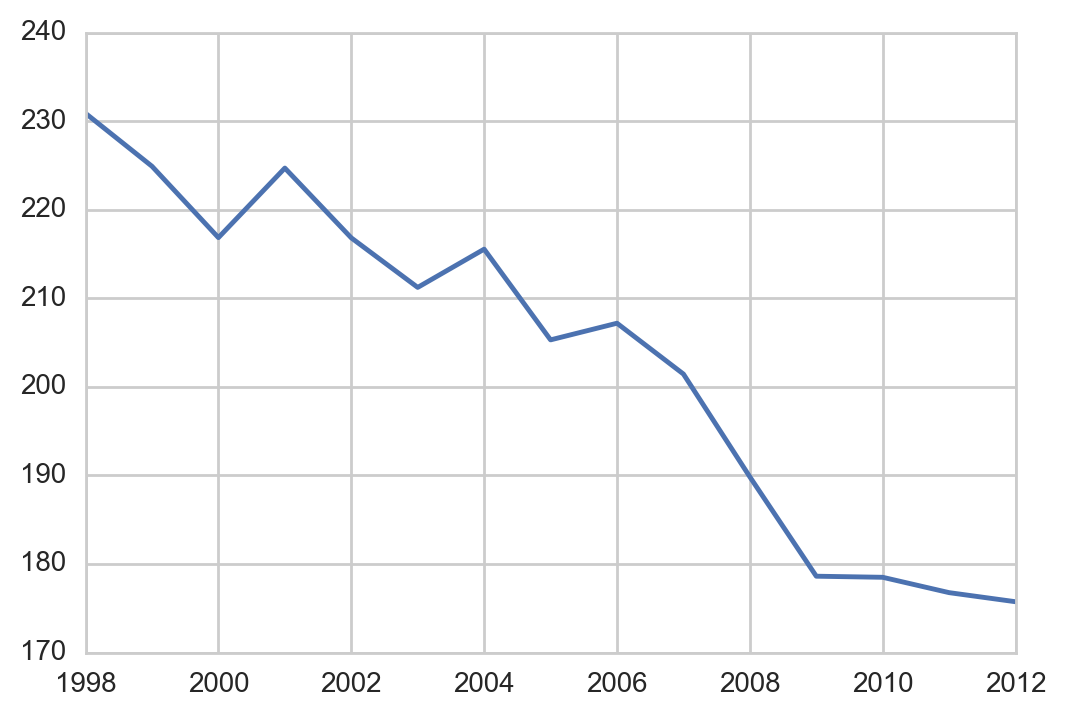

In [53]:
#How has the trend of male manufacturing jobs evolved over time
graph_6=df2[['year','male_Manuf_rate']].groupby(['year']).mean().reset_index().sort_values(by='year',ascending=True)
plt.plot(graph_6.year,graph_6.male_Manuf_rate)

In [139]:
#Let's see what is the share of manufacturing employment by gender 
df5.groupby('genders')['employment'].count().reset_index()

,genders,employment
0,1,1373
1,2,1249


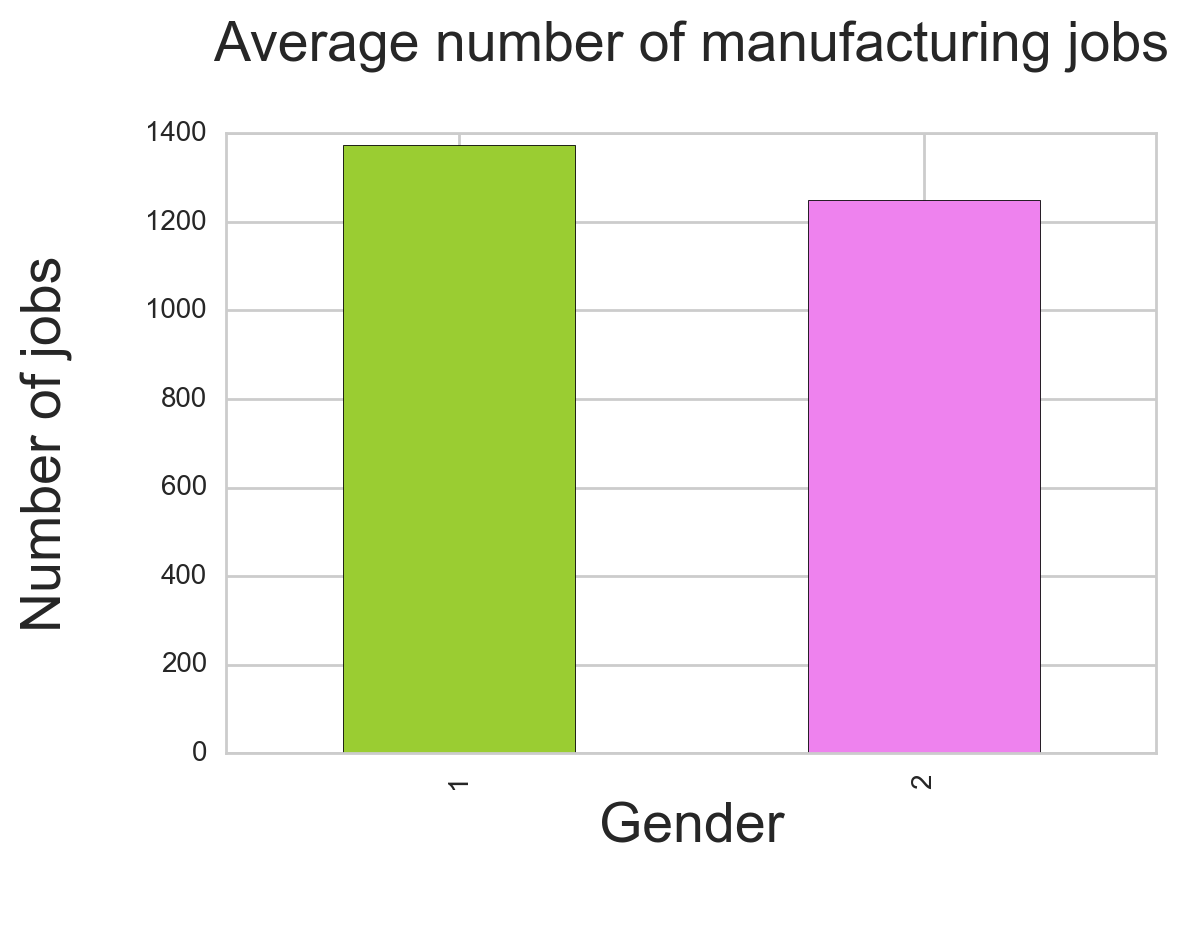

In [147]:
df5.groupby('genders')['employment'].count().plot(kind="bar", colors=['yellowgreen', 'violet'])
plt.title('Average number of manufacturing jobs\n', fontsize = 20)
plt.ylabel('Number of jobs\n', fontsize=20)
plt.xlabel('Gender\n', fontsize=20)
plt.show()


In [ ]:
#Please note that "1" represents "male" and "0"represents female

In [91]:
#We can see the correlation between all the numeric variables in our dataset
df7.corr()

,year,hom_rate,delitos_patrimoniales_rate,delitos_sexuales_rate,lesiones_rate,otros_delitos_rate,secuestro_rate,robo_comun_rate,robo_de_ganodo_rate,robo_en_carretoros_rate,robo_inst_bancarias_rate,fem_manuf_rate,male_manuf_rate
year,1.000000,0.080362,-0.052979,0.009958,-0.248104,-0.002686,0.120779,0.104022,0.443863,0.350923,0.140940,-0.109418,-0.102967
hom_rate,0.080362,1.000000,-0.186452,0.079792,-0.210692,-0.144242,0.238536,0.026379,-0.036115,0.108657,0.522052,-0.092421,-0.159028
delitos_patrimoniales_rate,-0.052979,-0.186452,1.000000,0.473436,0.796951,0.675363,-0.022654,0.736972,-0.020453,-0.165393,0.100945,0.277309,0.205644
delitos_sexuales_rate,0.009958,0.079792,0.473436,1.000000,0.414973,0.446025,0.103791,0.418164,0.033855,-0.022173,0.083922,-0.008672,-0.136235
lesiones_rate,-0.248104,-0.210692,0.796951,0.414973,1.000000,0.739214,-0.042356,0.630859,-0.109156,-0.206297,0.075222,0.339474,0.278699
otros_delitos_rate,-0.002686,-0.144242,0.675363,0.446025,0.739214,1.000000,-0.017076,0.450898,0.032887,-0.135787,0.021381,0.091246,-0.001117
secuestro_rate,0.120779,0.238536,-0.022654,0.103791,-0.042356,-0.017076,1.000000,0.121674,0.045197,0.102023,0.143363,0.015560,-0.011519
robo_comun_rate,0.104022,0.026379,0.736972,0.418164,0.630859,0.450898,0.121674,1.000000,-0.039138,-0.115685,0.340823,0.510725,0.386211
robo_de_ganodo_rate,0.443863,-0.036115,-0.020453,0.033855,-0.109156,0.032887,0.045197,-0.039138,1.000000,0.219071,-0.013957,-0.169015,-0.178397
robo_en_carretoros_rate,0.350923,0.108657,-0.165393,-0.022173,-0.206297,-0.135787,0.102023,-0.115685,0.219071,1.000000,-0.030746,-0.181283,-0.192789


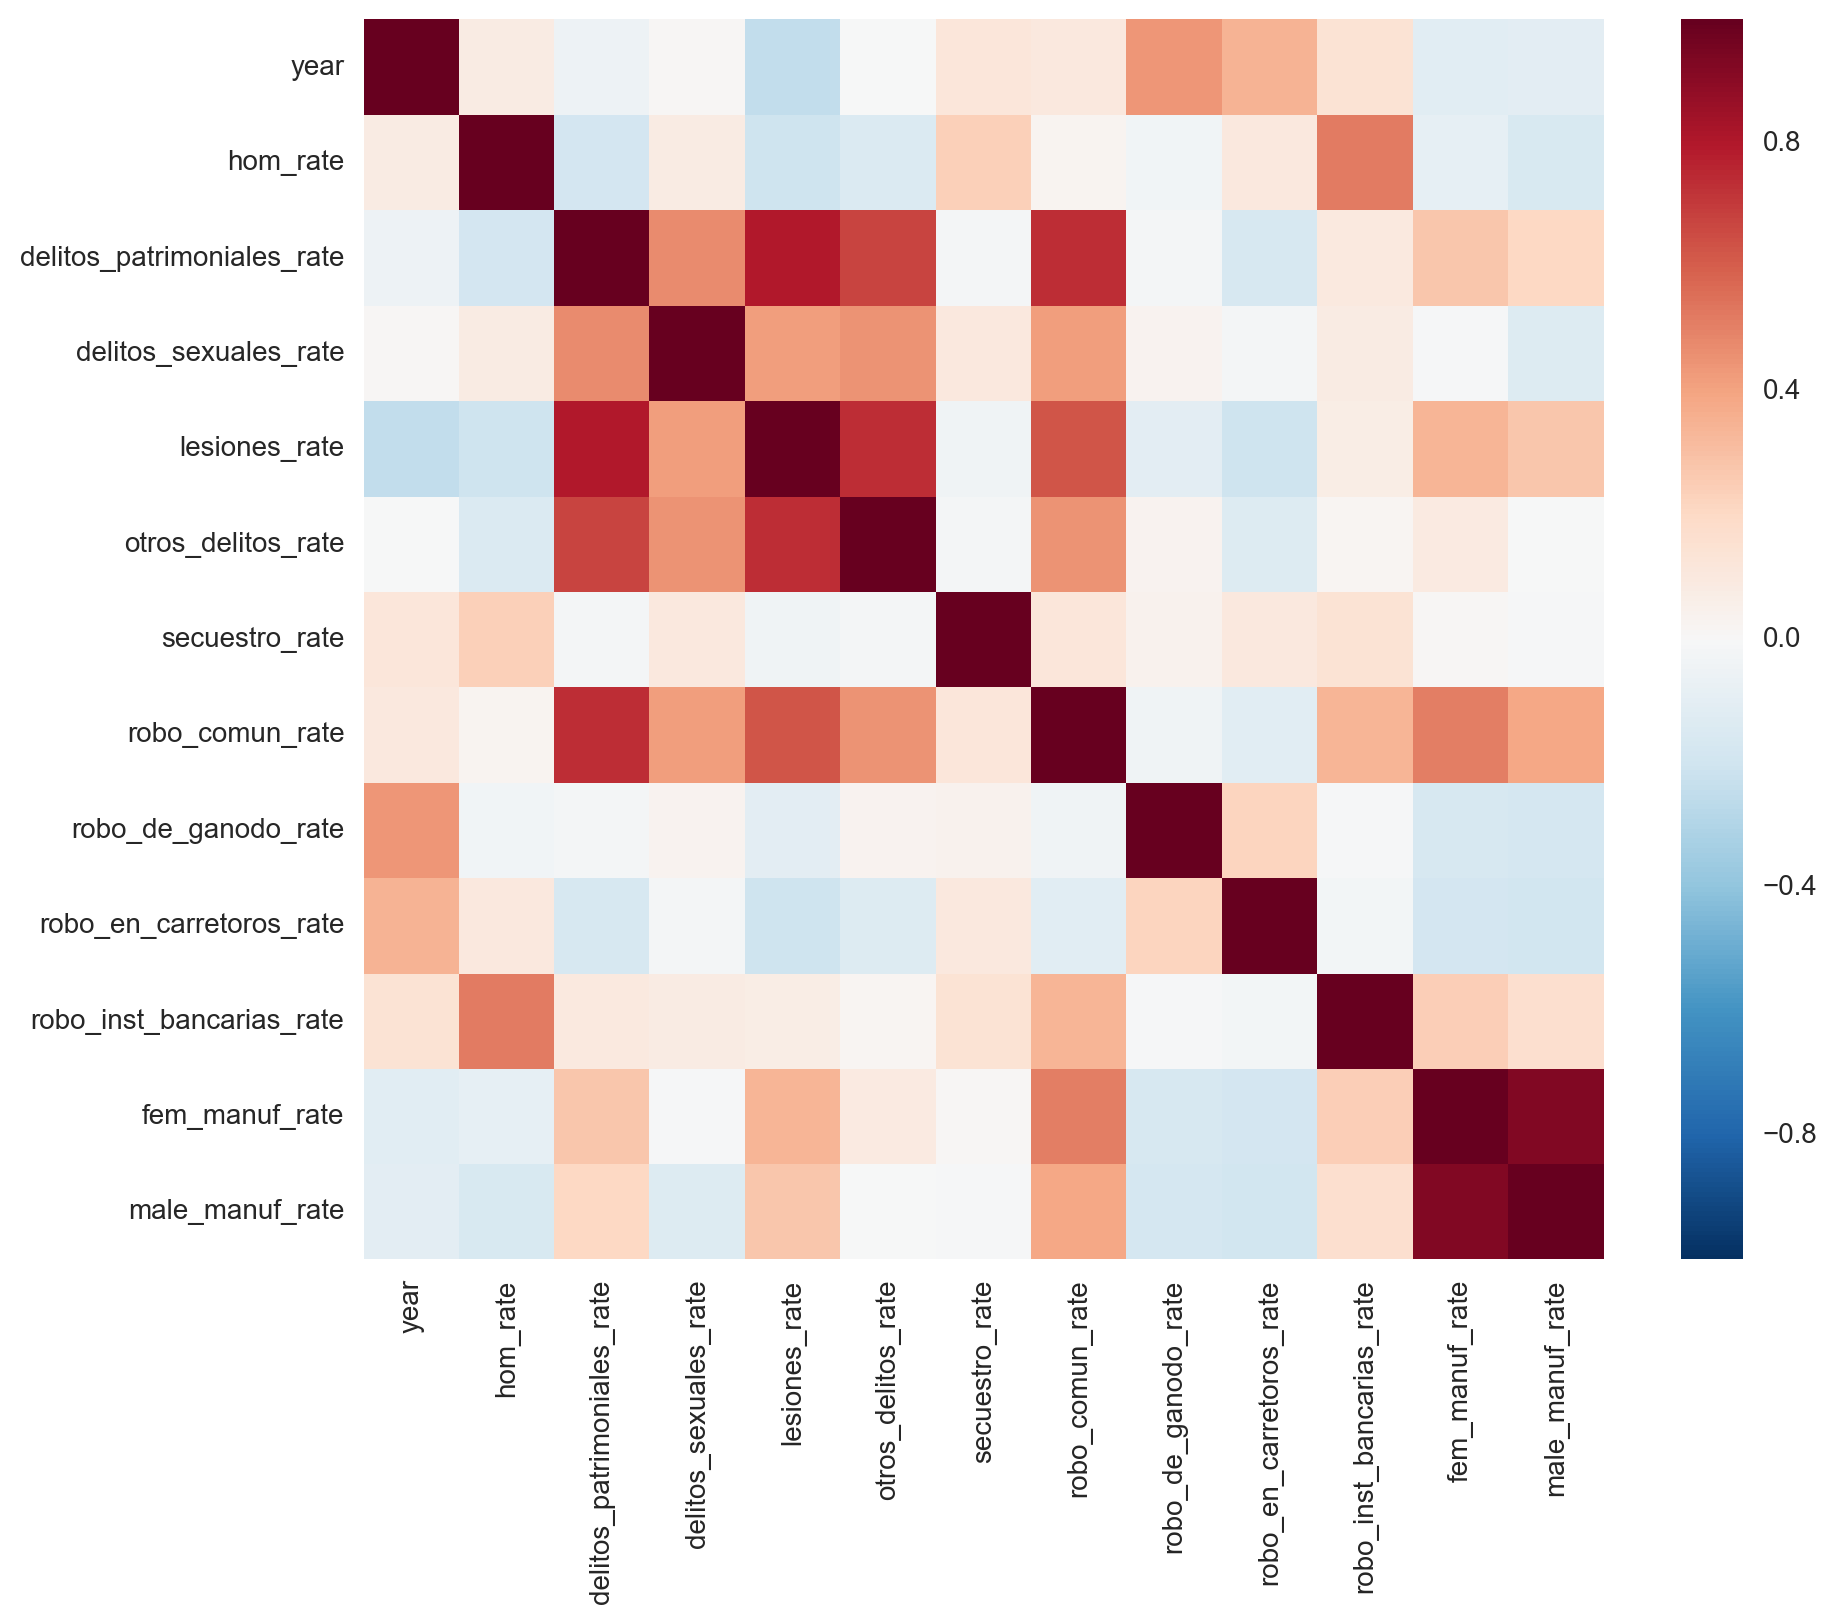

In [57]:
#We can also plot our correlation matrix 
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df7.corr(), ax=ax)
plt.show()

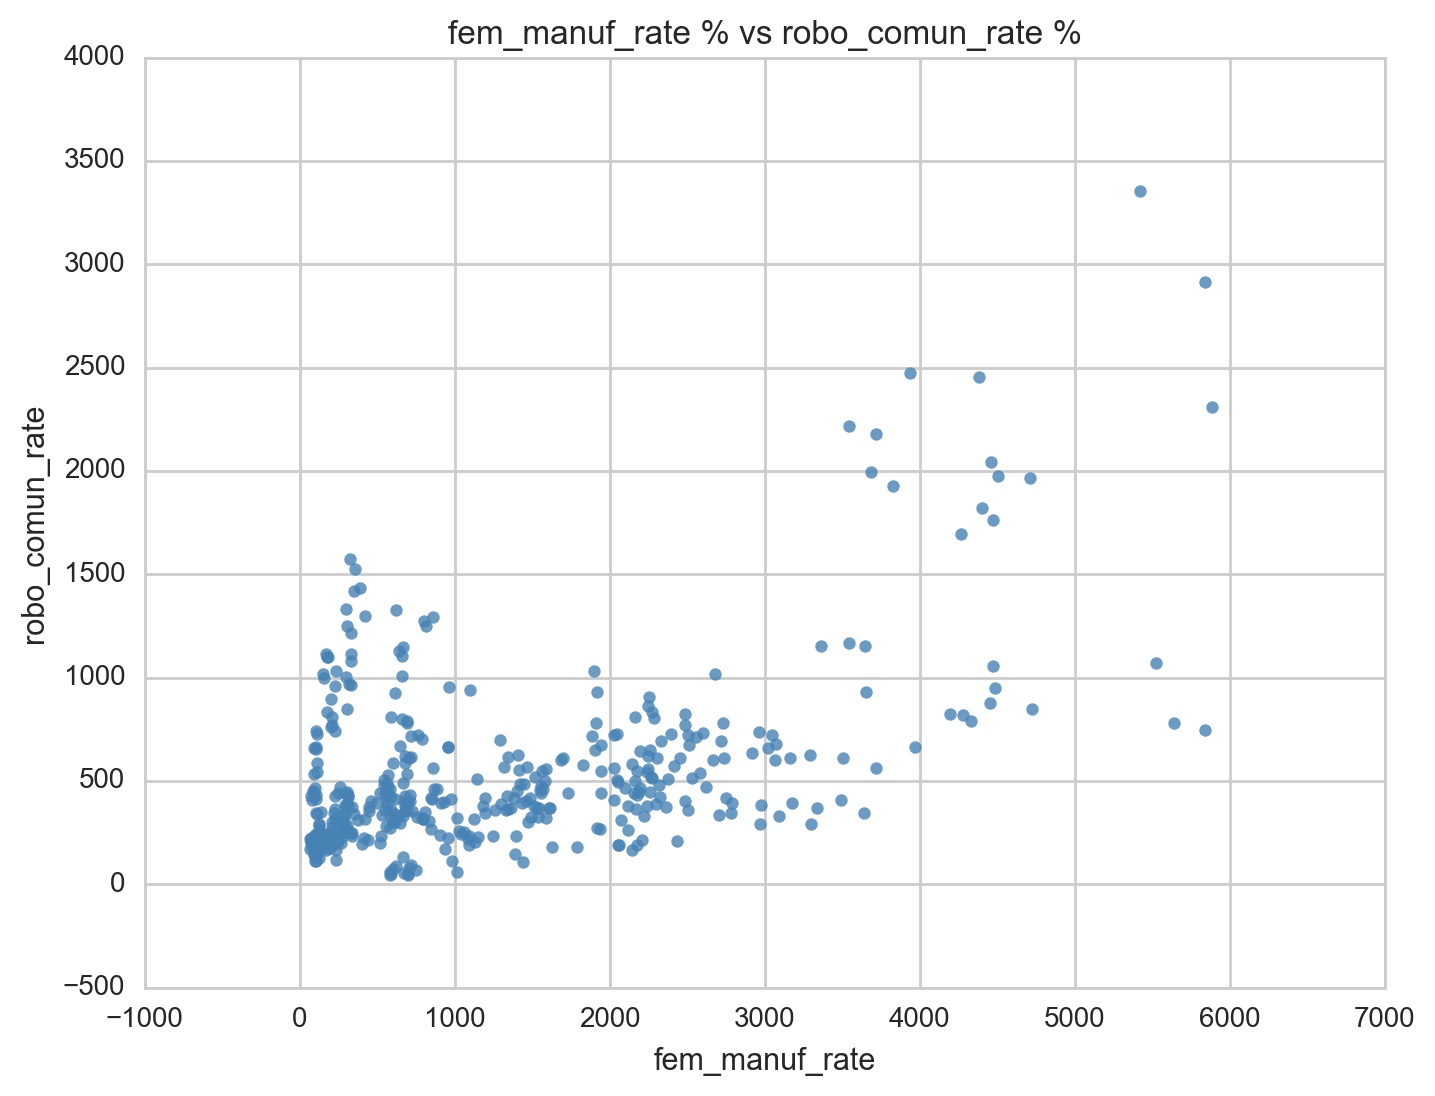

In [60]:
#Choose two variables that appear very related 
#Use seaborns regplot to plot a scatter plot between the pairs of variables

fem_manuf_rate = df7.fem_manuf_rate
robo_comun_rate = df7.robo_comun_rate

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(fem_manuf_rate, robo_comun_rate, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('fem_manuf_rate % vs robo_comun_rate %')
plt.show()


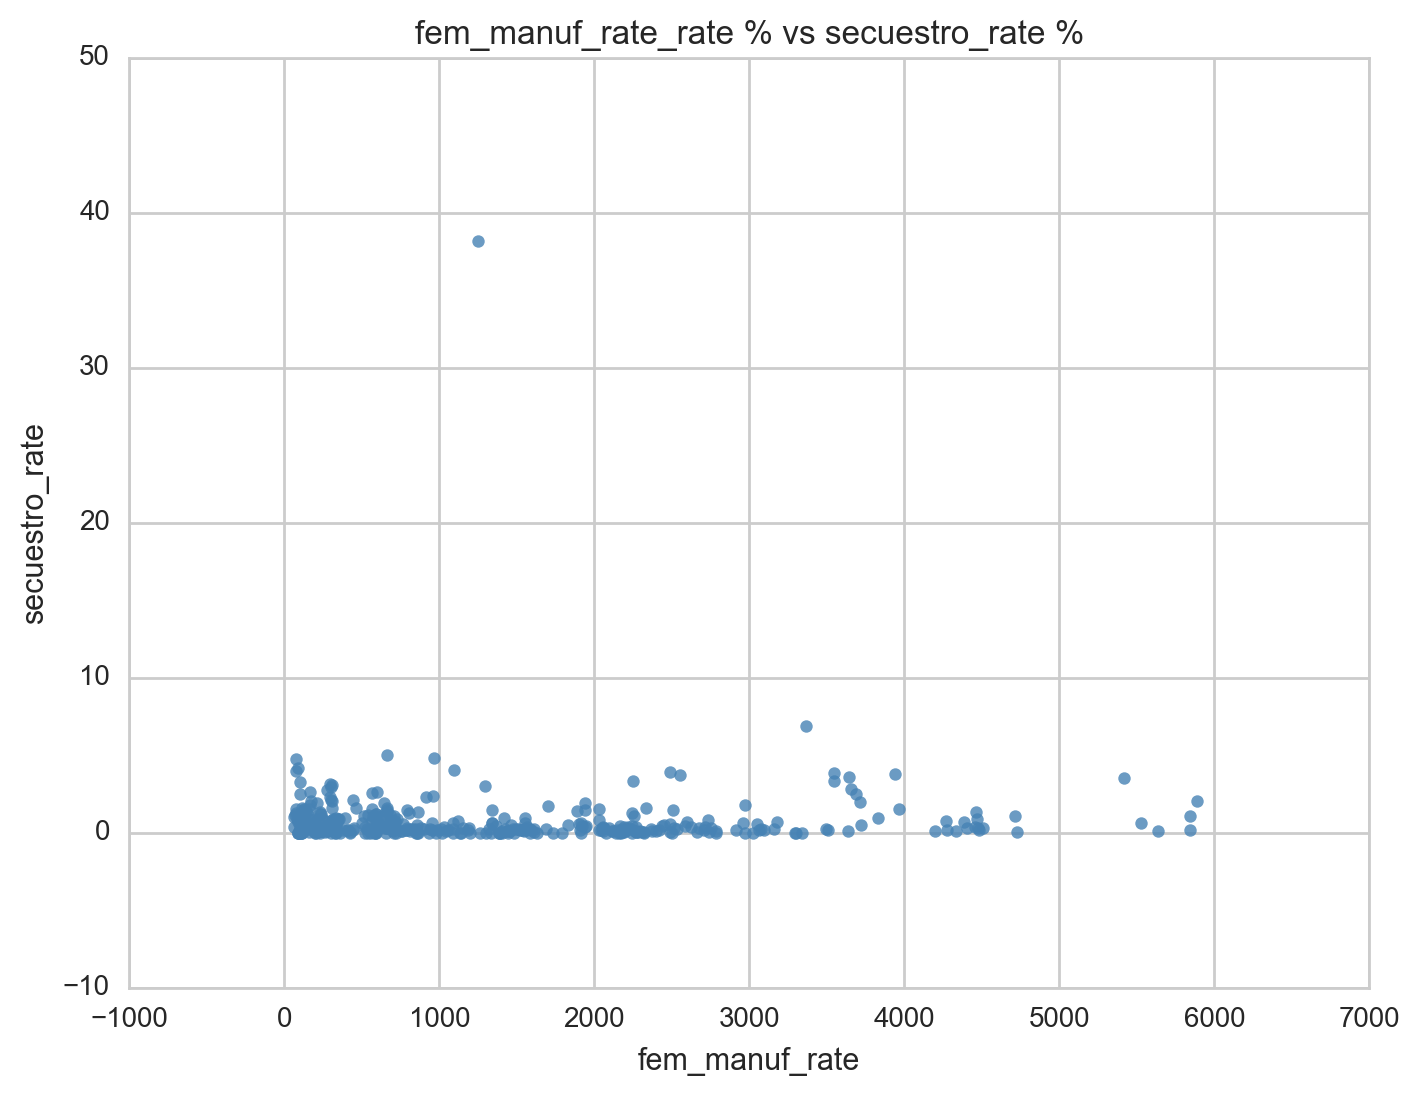

In [61]:
#Choose two variables that appear to be unrelated.
#Use seaborns regplot to plot a scatter plot between the pairs of variables
fem_manuf_rate = df7.fem_manuf_rate
secuestro_rate = df7.secuestro_rate


fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(fem_manuf_rate,secuestro_rate, fit_reg=False, color='steelblue', ax=ax)

ax.set_title('fem_manuf_rate_rate % vs secuestro_rate %')
plt.show()

# 4. Main Findings

#My data suggest that the 4 most common types of crime in Mexico are:
#burglaries, highway robberies, bank robberies and homicides. 

#From 1998 to 2012, I have discovered that the highest homicide rate was in 2010 in the state of Chihuaha and 
#the lowest homicide rate was in Tabasco in 2005.

#A time series plot has shown that 2010 was a particularly violent year during which Mexico has reached the highest crime rate #for all my variables in 2010.

#Official statistics suggest that in the early years of the Maquiladoras, 80% of the workforce was
#comprise by women and those factories have started hiring more men in the 1990s.  My histogram onfirms that since the end of
#the 1990s,the essential workforce in the Maquiladoras is male but the proportion of female workers is non-negligible.

#On one hand, my data suggest that extortion, injury and burglary are positively correlated with employment. More interestingly,
#that correlation is stronger for female employment. This finding is consistent with the "victimization" theory that suggests that more employment translates into more targets for violent crime.
#On the other hand, homicides, cattle theft, and highway robberies are negatively correlated with employment while kidnapping do not even #appear to be correlated with employment.
